<a href="https://colab.research.google.com/github/prabhupr70/DevTownSeeTheWorldThroughAI-ColabFiles-Day04/blob/main/ObjectDetection_Day04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See The World Thru AI

## Day 4: Mini YOLO Training
### [YouTube Video](https://www.youtube.com/live/Jd3oP1_vXrc)
### [Attendance Form](​​https://forms.gle/yBv3pV9wqUUDqa9F7)
### Goal: Train YOLO on a small dataset.
*   Use sample COCO dataset subset on your own dataset
*   Train for few epochs and evaluate

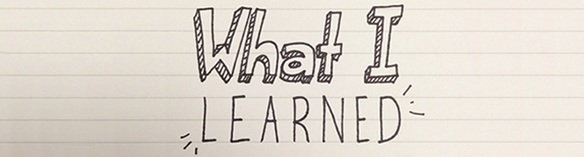
1.   Question: If 2 separate colab files use pip install, does that mean the package is installed twice
     Answer/Things I learned Question: No, running pip install in two separate Colab notebooks will not install the package twice on the same virtual machine (VM), because each notebook runs on its own isolated VM instance. The package is installed once for each notebook session.

     Installation per session: This isolation means that if you run !pip install my-package in Notebook A, the package is installed on that notebook's VM. If you then run the same command in Notebook B, it will install the package on Notebook B's VM, which is the first time that package has been installed on that specific machine.

     Automatic installation on reconnect: Because the VM is temporary, you will need to re-run your pip install commands if you disconnect from your runtime and reconnect later. This is why many notebooks include installation commands at the top.

2.   Refer "!unzip -q coco128.zip -d dataset"
     In this there was space as follows "- d", which took a while for me to understand that spaces like these can break things.

3.   In below section/code you had multiple changes & trouble shooting that was the most difficult part. In future, please walk-thru such changes very slowly so everybody knows HOW & WHY

     %%writefile dataset/coco128.yaml
     path: dataset/coco128
     train: images/train2017
     val: images/train2017

     nc: 80
     names:

In [ ]:
#*********************************************************
# Download & Install all Python packages/modules/libraries
# ultralytics: Used in YOLO. It constains predefined model
# opencv-python-headlesss: Without GUI how to do thr work using this package
# pillow: Image processing library
#*********************************************************
#opencv-python-headless matplotlib pillow
!pip install -q ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#*********************************************************
# Referring to the model
#*********************************************************
model=YOLO('yolov8n.pt')

In [ ]:
#*********************************************************
# Downloads 128 COCO dataset zip file (its a small sample of 128 images)
# COCO == Common Object in Context, large scale image dataset used in computer vision task like
# Object detection, image segmentatton, image captioning. Key point detection like position estimation
#*********************************************************
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  16.8M      0 --:--:-- --:--:-- --:--:-- 16.8M
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
images	labels	LICENSE  README.txt


In [ ]:
#*************************************************************
# names:  --> was all shared as hardcoded list by Ishan Mishra
# These are the 80 names provided (0 - 79)
#%%writefile dataset/coco128/data.yaml
#*************************************************************
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
 0: person
 1: bicycle
 2: car
 3: motorcycle
 4: airplane
 5: bus
 6: train
 7: truck
 8: boat
 9: traffic light
 10: fire hydrant
 11: stop sign
 12: parking meter
 13: bench
 14: bird
 15: cat
 16: dog
 17: horse
 18: sheep
 19: cow
 20: elephant
 21: bear
 22: zebra
 23: giraffe
 24: backpack
 25: umbrella
 26: handbag
 27: tie
 28: suitcase
 29: frisbee
 30: skis
 31: snowboard
 32: sports ball
 33: kite
 34: baseball bat
 35: baseball glove
 36: skateboard
 37: surfboard
 38: tennis racket
 39: bottle
 40: wine glass
 41: cup
 42: fork
 43: knife
 44: spoon
 45: bowl
 46: banana
 47: apple
 48: sandwich
 49: orange
 50: broccoli
 51: carrot
 52: hot dog
 53: pizza
 54: donut
 55: cake
 56: chair
 57: couch
 58: potted plant
 59: bed
 60: dining table
 61: toilet
 62: tv
 63: laptop
 64: mouse
 65: remote
 66: keyboard
 67: cell phone
 68: microwave
 69: oven
 70: toaster
 71: sink
 72: refrigerator
 73: book
 74: clock
 75: vase
 76: scissors
 77: teddy bear
 78: hair drier
 79: toothbrush

Writing dataset/coco128.yaml


In [ ]:
#*********************************************************
# Referring to the model
# (/content/dataset/coco128/images/val2017). The message also hints that Ultralytics expects downloaded datasets
# under /content/datasets by default.
# Here Model Training is completed & its ready for consumption
#*********************************************************
model = YOLO("yolov8n.pt")
model.train(
    data="/content/dataset/coco128.yaml",
    epochs=3,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa85c510b60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [ ]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000089.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000089.jpg: 480x640 9 knifes, 1 microwave, 1 oven, 46.4ms
Speed: 1.8ms preprocess, 46.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/YOLO_Training/yolov8n_custom2


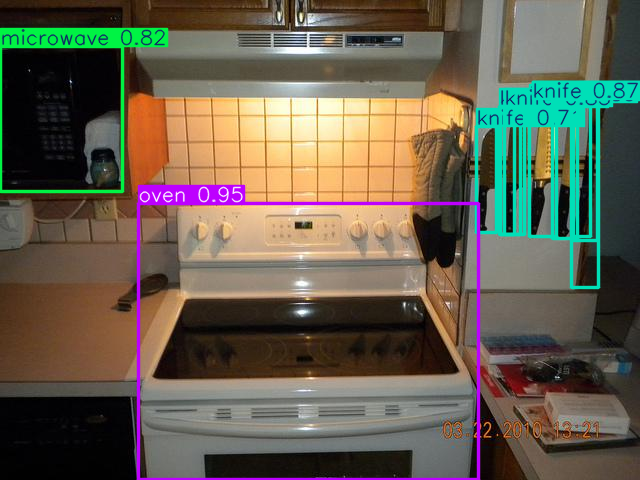

In [ ]:
results[0].show()

In [ ]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000338.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000338.jpg: 352x640 2 persons, 2 ovens, 1 refrigerator, 1 clock, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
Results saved to /content/YOLO_Training/yolov8n_custom4


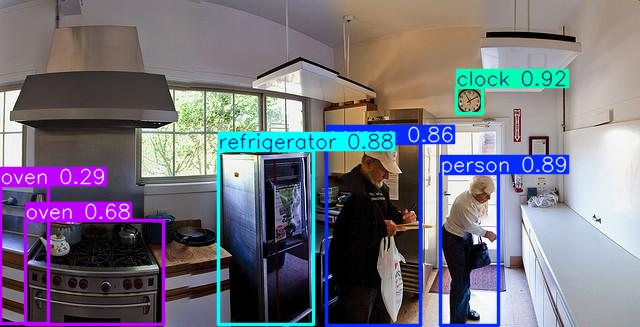

In [ ]:
results[0].show()

In [ ]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000641.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000641.jpg: 448x640 3 persons, 1 bus, 48.1ms
Speed: 1.6ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/YOLO_Training/yolov8n_custom5


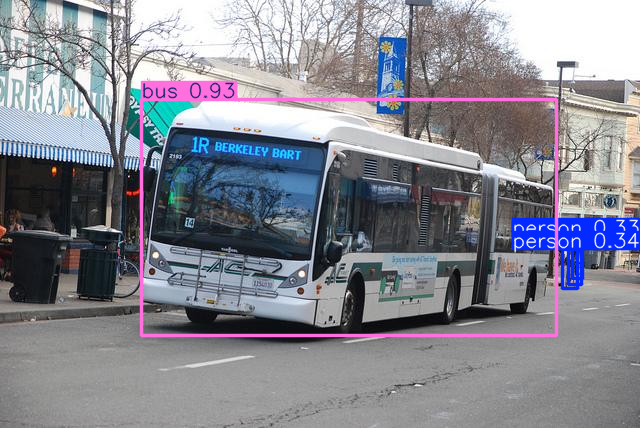

In [ ]:
results[0].show()

In [ ]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000536.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000536.jpg: 480x640 3 persons, 1 sports ball, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/YOLO_Training/yolov8n_custom6


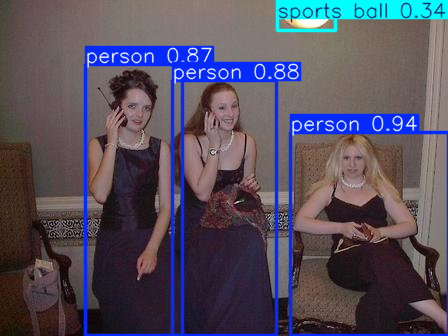

In [ ]:
results[0].show()